## Import modules

In [175]:
import os
import shutil
import albumentations as A
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random

from tqdm import tqdm
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from glob import glob

## 디렉토리 핸들링 훈련

In [2]:
path = "G:/내 드라이브/Colab Notebooks/boost_camp_mask/level1_imageclassification_cv-level1-cv-06/T4064/dataset"
test_dir_path = os.path.join(path,'for_test')
print(test_dir_path)
os.makedirs(test_dir_path, exist_ok=True) # 없으면 만들어라 있으면 그냥 pass

G:/내 드라이브/Colab Notebooks/boost_camp_mask/level1_imageclassification_cv-level1-cv-06/T4064/dataset\for_test


In [3]:
## 폴더 복사하기
img_dir_path = os.path.join(path,'train/images')

for folder_dir in glob(img_dir_path+'/*'): # glob를 이용해 해당 폴더 내부의 하위 폴더명을 따온다
    folder_name = folder_dir.split('\\')[-1] # 폴더이름만 가져온다.
    dest_folder_dir = os.path.join(test_dir_path, folder_name) # 복사할 폴더명을 원래 데이터의 이름으로 사용
    try:
        shutil.copytree(folder_dir, dest_folder_dir) # copytree(from_folder, to_folder), to_folder는 없어야 함.
    except Exception as e: # 이미 폴더가 존재할 경우 오류가 발생하므로 try~except
        print(e)
        break

[WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'G:/내 드라이브/Colab Notebooks/boost_camp_mask/level1_imageclassification_cv-level1-cv-06/T4064/dataset\\for_test\\003106_female_Asian_20'


In [10]:
## 특정 폴더 이름바꿔서 다시만들기
folder_dir = glob(test_dir_path + '/*')[-1] # 딱 하나의 폴더 dir선택
print(folder_dir)
folder_name = folder_dir.split('\\')[-1]
new_folder_dir = test_dir_path + '/new_' + folder_name
try:
    shutil.copytree(folder_dir, new_folder_dir)
except Exception as e:
    print(e)
shutil.rmtree(new_folder_dir) # remove error, rmdir error, 

G:/내 드라이브/Colab Notebooks/boost_camp_mask/level1_imageclassification_cv-level1-cv-06/T4064/dataset\for_test\new_new_new_new_new_new_003012_female_Asian_18


In [12]:
## 폴더 삭제
del_folder_dir = glob(test_dir_path + '/new_*')
[shutil.rmtree(dir) for dir in del_folder_dir]

[None, None, None, None, None, None]

## transforms 연습  
* plt를 이용한 이미지 확인 방법 숙달  
* gridview 이용 숙달  
* 원하는 transform 적용후 이미지 10개의 결과 확인  


In [172]:
imgs_paths = list(glob(test_dir_path+'/*/*'))

In [173]:
img_paths_10 = imgs_paths[:10]

In [77]:
## PIL.Image.open을 사용하여 이미지를 읽어오고 np.array변환
img = np.array(Image.open(img_paths_10[0])) # 윈도우에서는 cv2.imread가 오류가 발생가능하니 Image.open사용
type(img)

numpy.ndarray

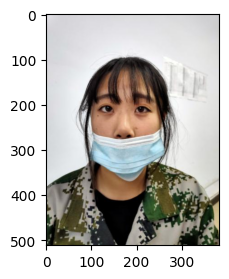

In [78]:
plt.figure(figsize=(3,3))
plt.imshow(img)

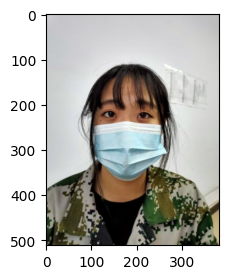

In [94]:
img = np.array(Image.open(img_paths_10[5]))
plt.figure(figsize=(3,3))
plt.imshow(img)

### grid view

In [114]:
np_imgs = [np.array(Image.open(img)) for img in img_paths_10]

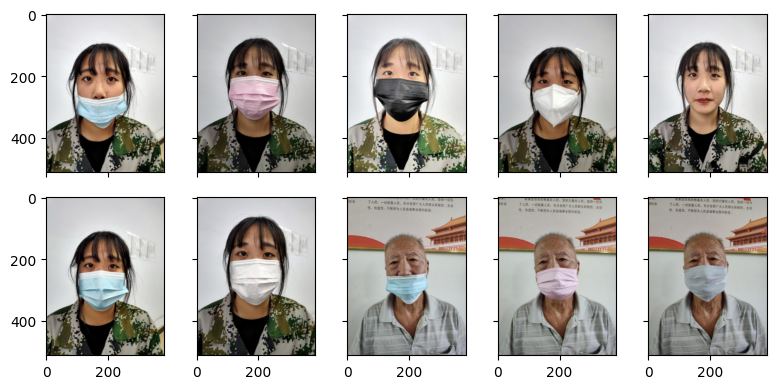

In [136]:
## grid view 만들기
## 이중 for을 이용해서 만들되 np_imgs의 index에 n_col을 곱해서 표현하자.
n_rows, n_cols = 2, 5
# 0 1 2 3 4
# 0 1
fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(8,4))
for i in range(n_rows):
    for j in range(n_cols):
        axes[i][j].imshow(np_imgs[n_cols*i+j])

plt.tight_layout()

### transform

#### 적용할 transform
- CenterCrop : 배경이 차지하는 비율이 큼
- ToGray : 색상 구분 없이도, 가능할 것 같음
- Horizontal Flip : 좌우 반전
- BrightnessContrast : 밝기와 대조 변경
- Gaussian Blur : 초점 나간 경우
- GridDistortion : 얼굴의 형태를 변경시킴
- ColorJitter : 피부 톤을 변경 시킴
- Rotate : 약한 rotate

In [179]:
imgs_paths = list(glob(test_dir_path+'/*/*'))

In [180]:
random.shuffle(imgs_paths)
img_paths_10 = imgs_paths[:10]
np_imgs = [np.array(Image.open(img)) for img in img_paths_10]

In [181]:
np_imgs[0].shape

(512, 384, 3)

original size:(512, 384, 3)
transformed size:(224, 224, 3)


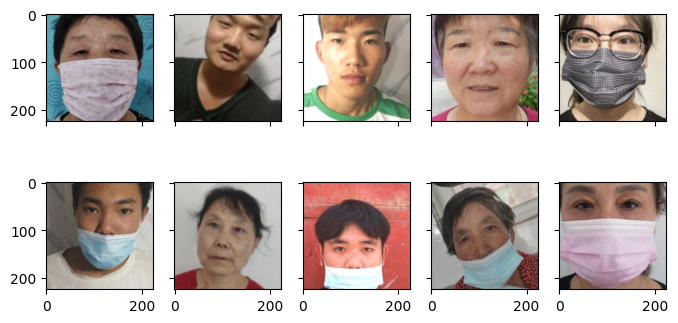

In [235]:
import albumentations as A
origin_width, origin_height, _ = np_imgs[0].shape
original_size = np_imgs[0].shape
print(f'original size:{original_size}')
transforms = A.Compose([
                        A.CenterCrop(height=224, width=224, p=1),
                        # A.ToGray(p=1),
                        A.HorizontalFlip(p=0.5),
                        A.RandomBrightnessContrast(p=0.5),
                        A.GaussianBlur(p=0.5),
                        # A.GridDistortion(p=1),
                        A.Rotate(limit=30, p=0.5)
                        ], 
                        p=1)
transformed_img_size = transforms(image = np_imgs[0])['image'].shape
print(f'transformed size:{transformed_img_size}')
n_rows, n_cols = 2, 5
fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(8,4))

for i in range(n_rows):
    for j in range(n_cols):
        tmp = transforms(image = np_imgs[n_cols*i+j])['image']
        axes[i][j].imshow(transforms(image = np_imgs[n_cols*i+j])['image'])

original size:(512, 384, 3)
transformed size:(384, 256, 3)


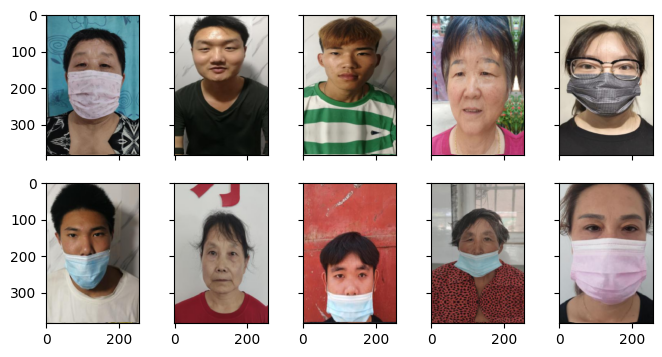

In [234]:
import albumentations as A
origin_width, origin_height, _ = np_imgs[0].shape
original_size = np_imgs[0].shape

print(f'original size:{original_size}')

transforms = A.Compose([
                        A.CenterCrop(height=origin_height//1, width=origin_width//2, p=1),
                        # A.ToGray(p=1),
                        # A.HorizontalFlip(p=0.5),
                        # A.RandomBrightnessContrast(p=0.5),
                        # A.GaussianBlur(p=0.5),
                        A.GridDistortion(p=1),
                        # A.Rotate(limit=30, p=0.5)
                        ], 
                        p=1)

transformed_img_size = transforms(image = np_imgs[0])['image'].shape
print(f'transformed size:{transformed_img_size}')

n_rows, n_cols = 2, 5
fig, axes = plt.subplots(n_rows, n_cols, sharex=True, sharey=True, figsize=(8,4))

for i in range(n_rows):
    for j in range(n_cols):
        tmp = transforms(image = np_imgs[n_cols*i+j])['image']
        axes[i][j].imshow(transforms(image = np_imgs[n_cols*i+j])['image'])